In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

$$y=3x+4,x\in(0,2)$$

In [2]:
X = 2*np.random.rand(100,1)
y = 4+ 3*X +np.random.randn(100,1)

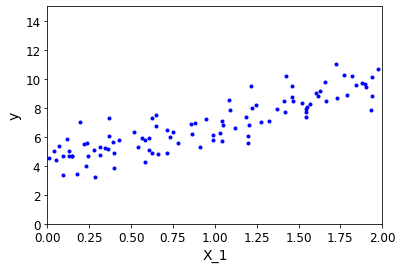

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

### 纯粹的数学推导
$$\theta=(X^TX)^{-1}X^Ty$$

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

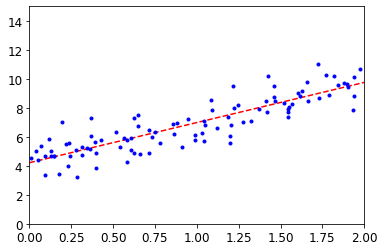

In [8]:
plt.plot(X_new,y_predict,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

$$(X^TX)^{-1}$$
不是一定可求

### 梯度下降

![title](./2.png)

梯度下降公式:$$\theta_j^\prime=\theta_j+\alpha\frac{1}{n+1}\sum_{k=i}^{i+n}(y^k-h_\theta(x^k))x_j^k$$

In [10]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

### 学习率问题

![title](./3.png)
![title](./4.png)

In [12]:
theta_path_bgd = []
def plot_gradient_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'b-')
        gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta = {}'.format(eta))

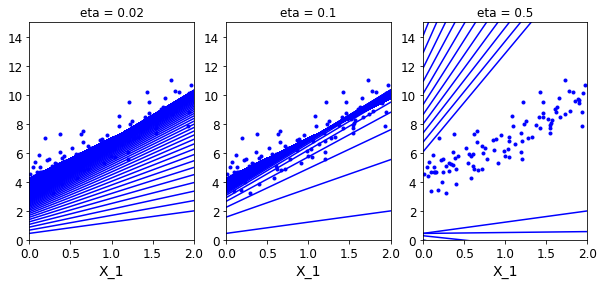

In [13]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()

### 数据标准化
$$
(x-\theta) \over \sigma
$$

### 多项式回归
$$
y=0.5x^2+x,x\in(-3,3)
$$

In [32]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2+X+np.random.randn(m,1)

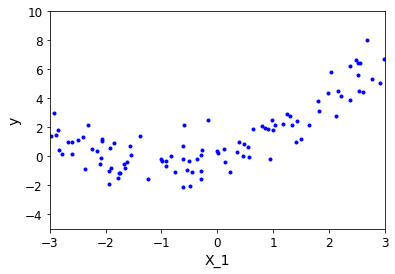

In [33]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.17990494])

In [35]:
X_poly[0]

array([1.17990494, 1.39217568])

In [36]:
X[0]**2

array([1.39217568])

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print (lin_reg.coef_)
print (lin_reg.intercept_)

[[0.95225956 0.47280012]]
[0.06004082]


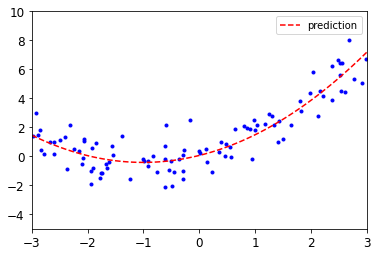

In [38]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

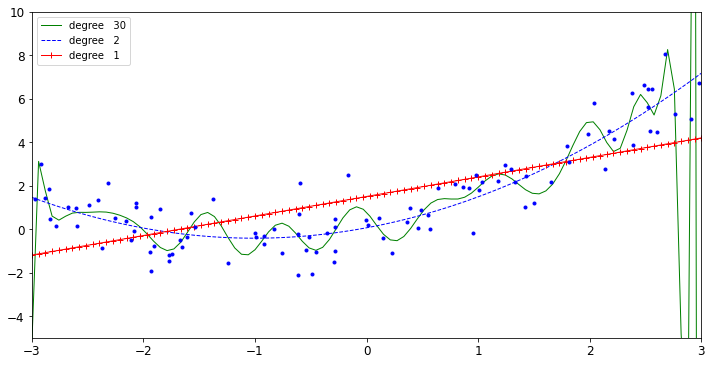

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12,6))
for style,width,degree in (('g-',1,30),('b--',1,2),('r-+',1,1)):
    poly_features = PolynomialFeatures(degree = degree,include_bias = False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([('poly_features',poly_features),
             ('StandardScaler',std),
             ('lin_reg',lin_reg)])
    polynomial_reg.fit(X,y)
    y_new_2 = polynomial_reg.predict(X_new)
    plt.plot(X_new,y_new_2,style,label = 'degree   '+str(degree),linewidth = width)
plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

### 样本数量的影响

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state=100)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth = 2,label = 'train_error')
    plt.plot(np.sqrt(val_errors),'b-',linewidth = 3,label = 'val_error')
    plt.xlabel('Trainsing set size')
    plt.ylabel('RMSE')
    plt.legend()

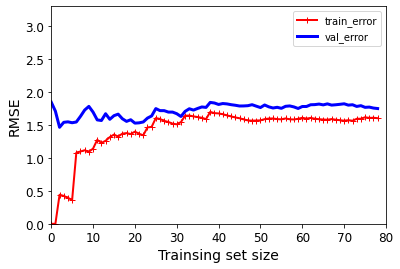

In [41]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3.3])
plt.show()

### 过拟合风险

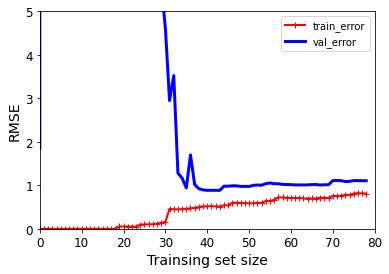

In [42]:
polynomial_reg = Pipeline([('poly_features',PolynomialFeatures(degree = 25,include_bias = False)),
             ('lin_reg',LinearRegression())])
plot_learning_curves(polynomial_reg,X,y)
plt.axis([0,80,0,5])
plt.show()

### 正则化处理
$$
Ridge:J(\theta)=MSE(\theta)+{1\over2}\alpha \sum{\theta^2}
$$
$$
Lasso:J(\theta)=MSE(\theta)+\alpha \sum|\theta|
$$

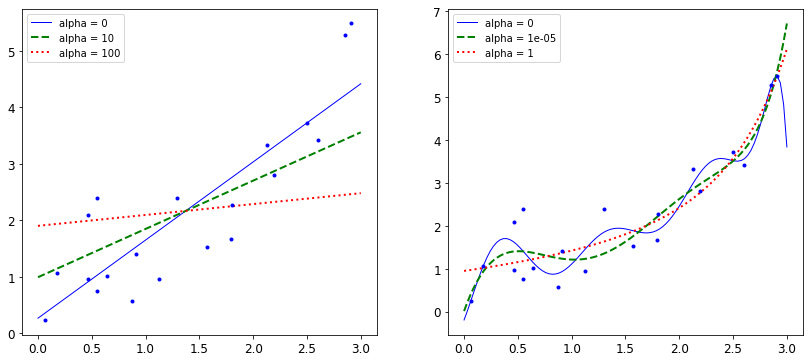

In [45]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 0.5 * X**2 +np.random.randn(m,1)/1.5 +1
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_calss,polynomial,alphas,**model_kargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_calss(alpha,**model_kargs)
        if polynomial:
            model = Pipeline([('poly_features',PolynomialFeatures(degree =10,include_bias = False)),
             ('StandardScaler',StandardScaler()),
             ('lin_reg',model)])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth = lw,label = 'alpha = {}'.format(alpha))
    plt.plot(X,y,'b.',linewidth =3)
    plt.legend()

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas = (0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas = (0,10**-5,1))
plt.show()